<a href="https://colab.research.google.com/github/Karimsamnani/Phoenix/blob/main/we4tech(B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

Attributes :

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)





In [ ]:
# Standard Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# ML standard libraries
from sklearn.preprocessing import MinMaxScaler as scaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.model_selection import RandomizedSearchCV as RSCV 

# for avoiding warnings 
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [ ]:
# load the dataset
df=pd.read_csv('./student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Exploratory Data Analysis (EDA) :**

In [ ]:
# renaming some columns values in order to make the plot visualization cleaner

D= {'address': {'U':'Urban', 'R':'Rural'},
           'famsize': {'LE3':'Less then 3', 'GT3':'Greater then 3'},
           'Pstatus': {'T':'Together', 'A':'Apart'}}

for column in list(D.keys()):
    df[column] = df[column].map(D[column])

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,Urban,Greater then 3,Apart,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,Urban,Greater then 3,Together,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,Urban,Less then 3,Together,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,Urban,Greater then 3,Together,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,Urban,Greater then 3,Together,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,Urban,Less then 3,Apart,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,Urban,Less then 3,Together,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,Rural,Greater then 3,Together,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,Rural,Less then 3,Together,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


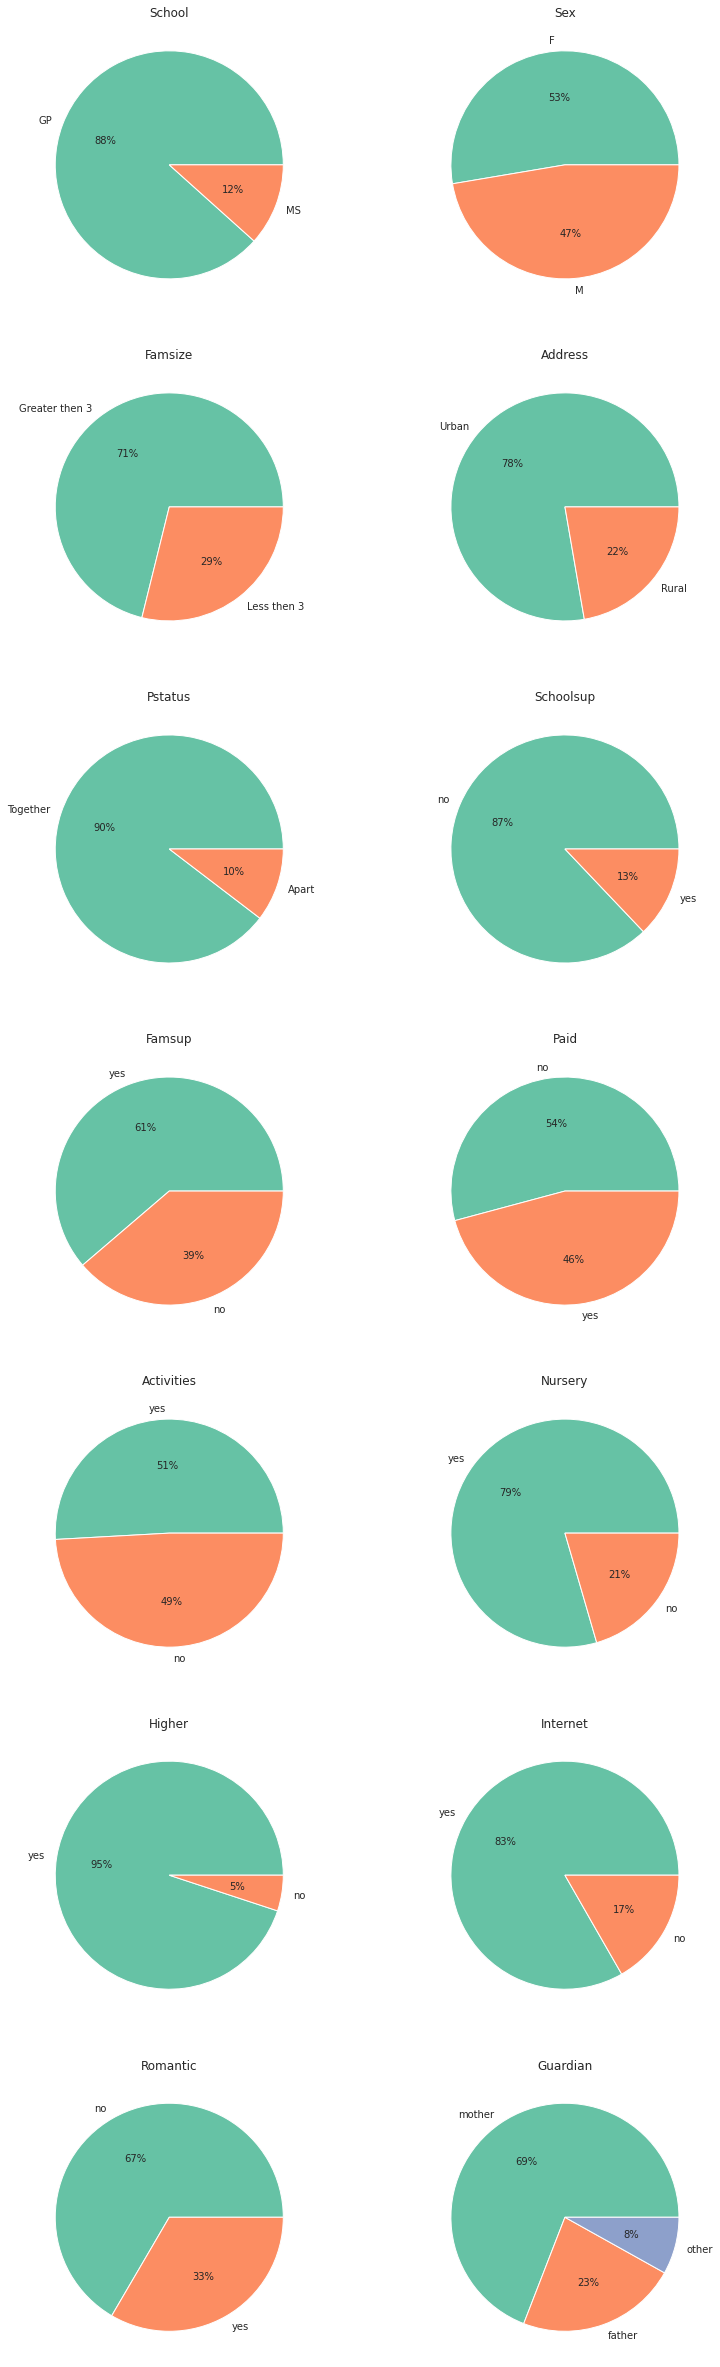

In [ ]:
# pie charts for categorical data

categorical=['school','sex','famsize','address','Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','guardian']

f, axes=plt.subplots(7,2,figsize=(13,43))
for i,feature in enumerate(categorical):
    plt.subplot(7,2,i+1)
    plt.pie(df[feature].value_counts(),
       labels=df[feature].value_counts().index,
       autopct='%.0f%%',
       colors=sns.color_palette('Set2'))
    plt.title(feature.capitalize())
plt.show()

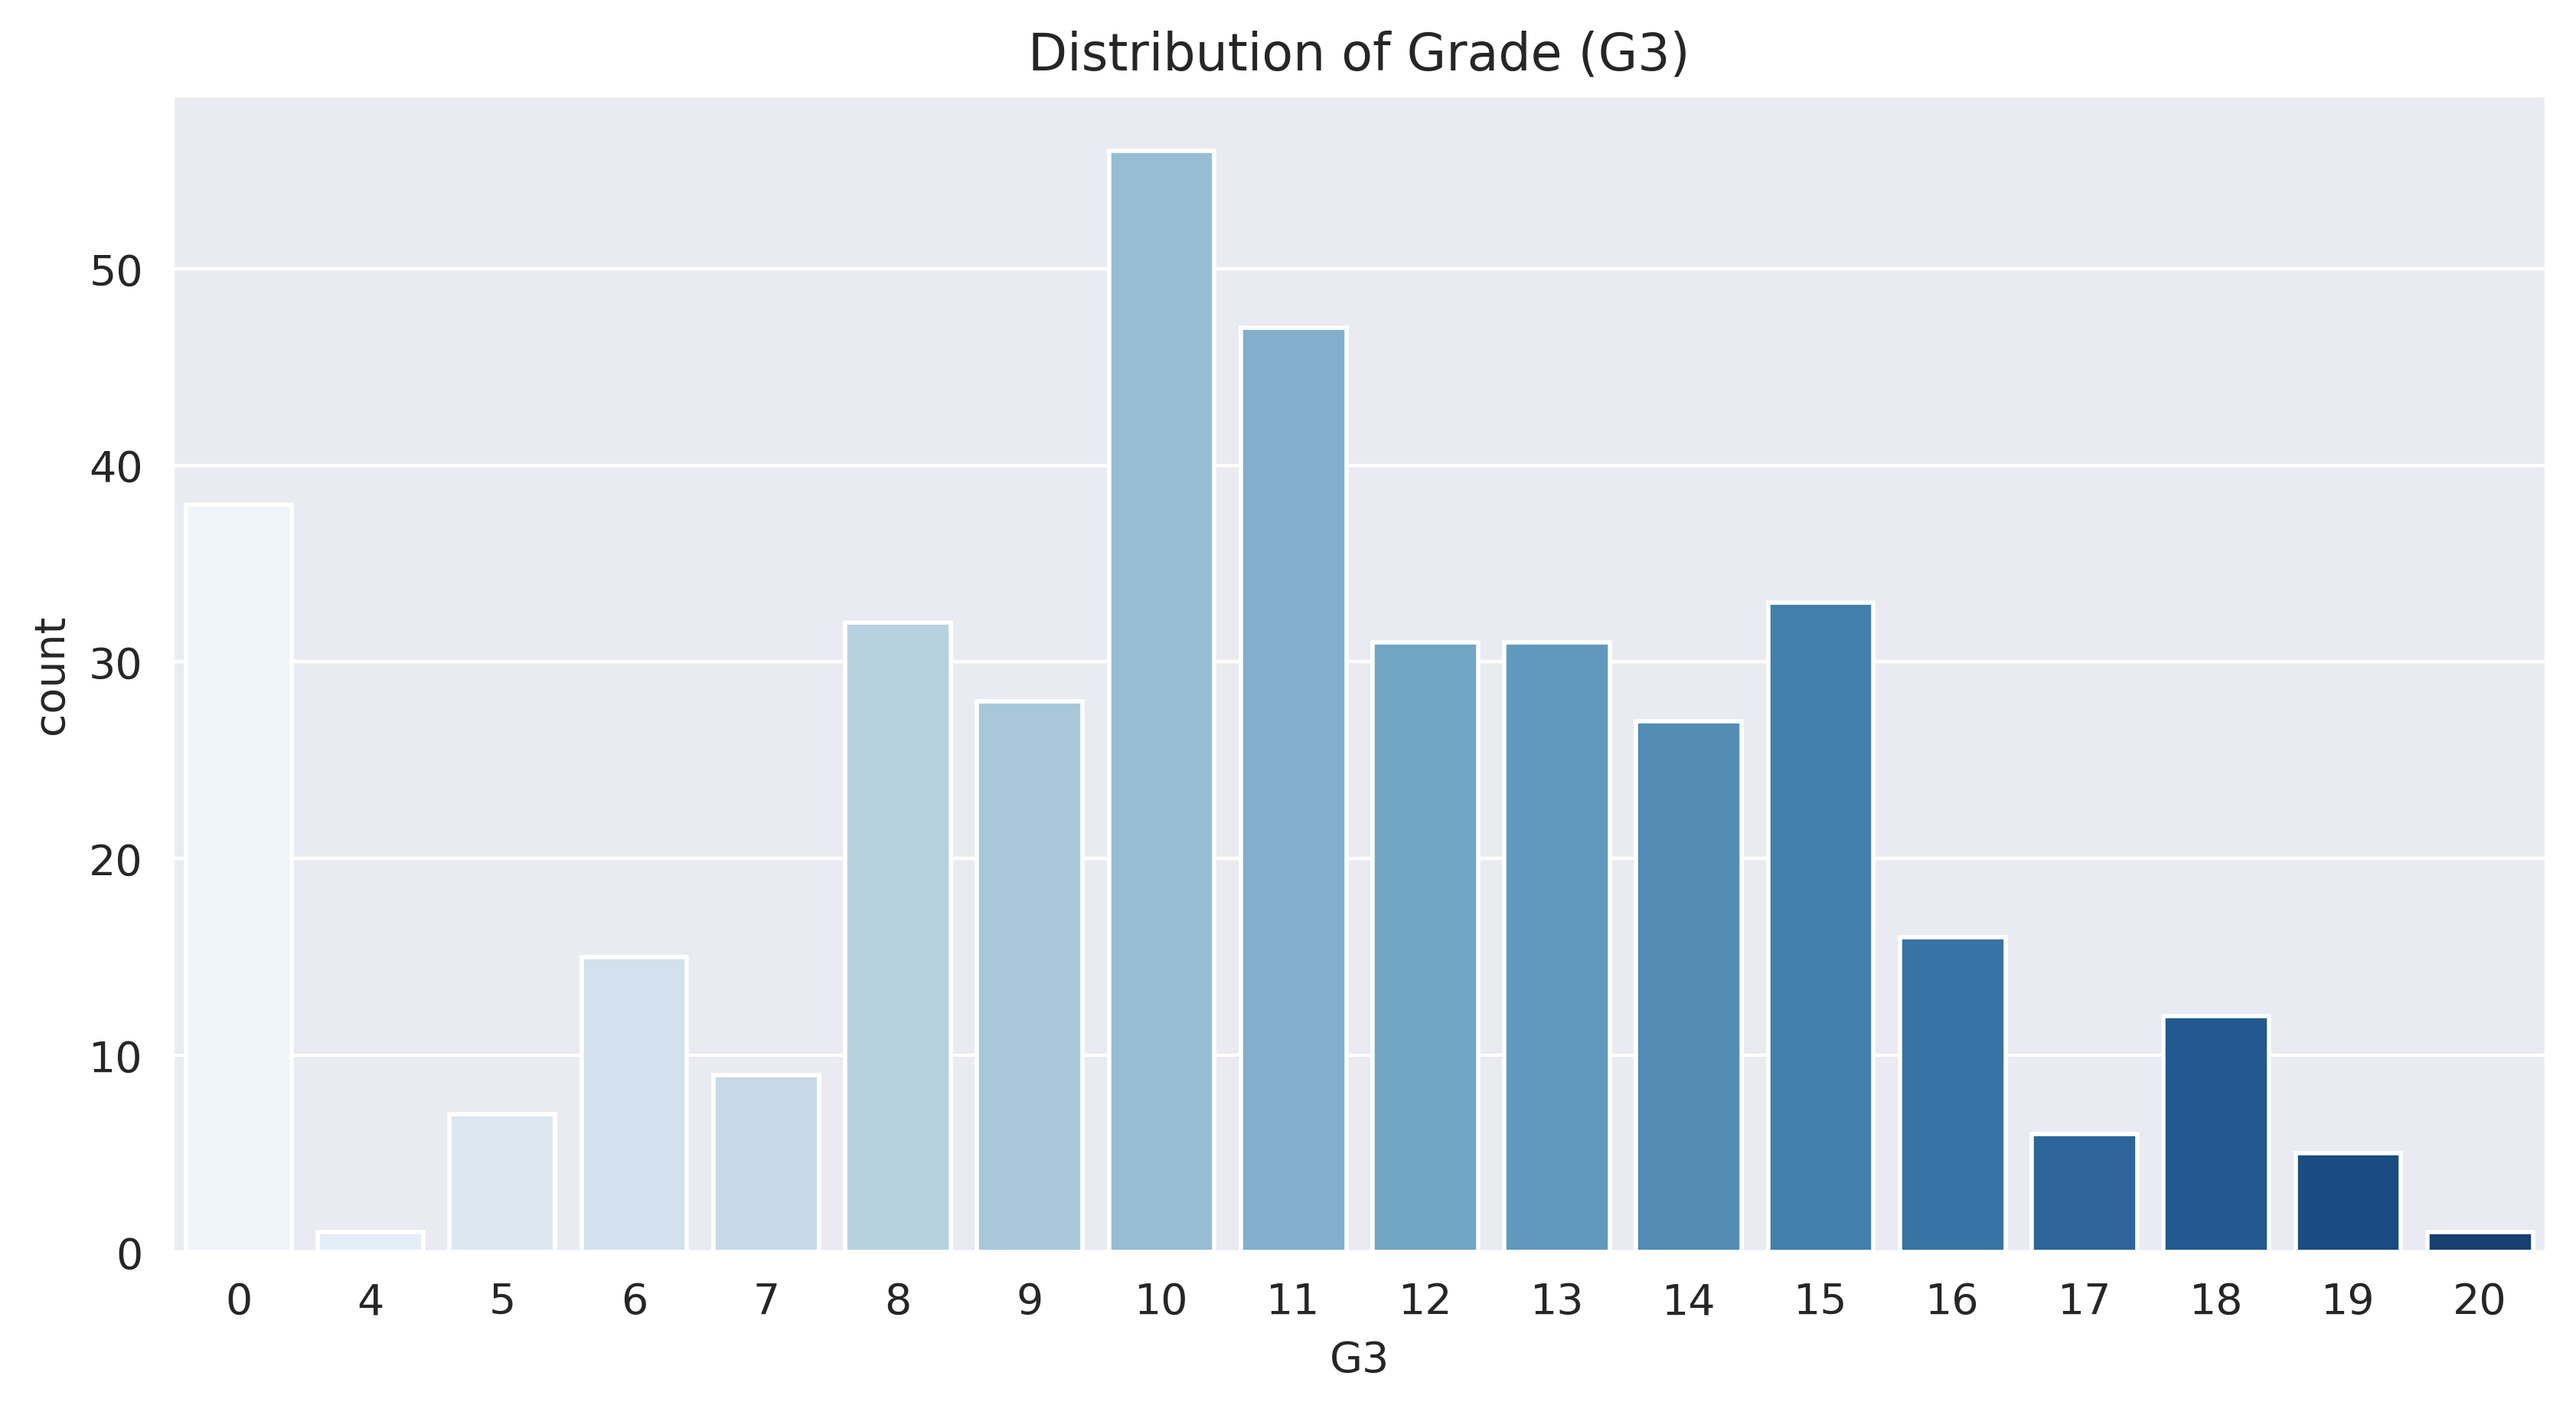

In [ ]:
# distribution of G3

plt.figure(figsize=(10, 5), dpi=400)
sns.countplot(x = df['G3'], palette='Blues')
plt.title('Distribution of Grade (G3)')
plt.show()

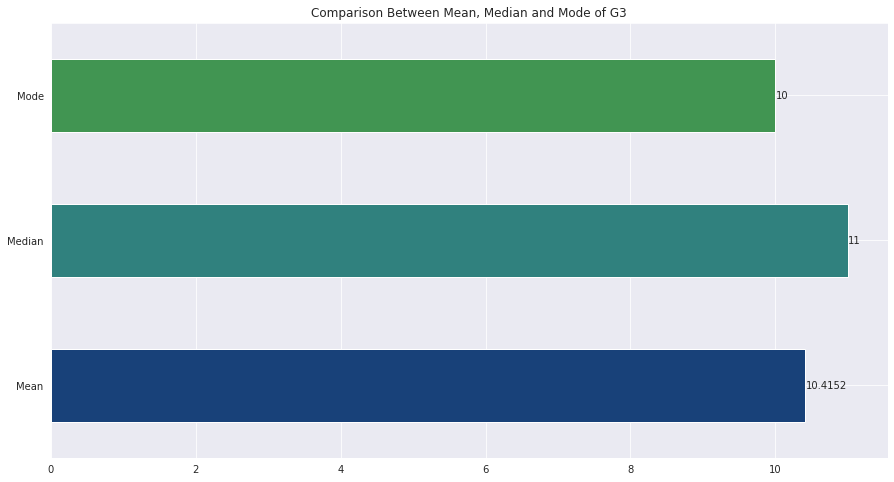

In [ ]:
# mean,median,mode for G3

plt.figure(figsize=(15,8))
ax=pd.Series({'Mean': df.G3.mean(), 'Median': df.G3.median(), 'Mode': df.G3.mode()[0]}).plot(kind='barh',
         title='Comparison Between Mean, Median and Mode of G3', color=sns.color_palette('gist_earth'))

for container in ax.containers:
  ax.bar_label(container) 

plt.show()

**Analyzing difference between males and females grades :**

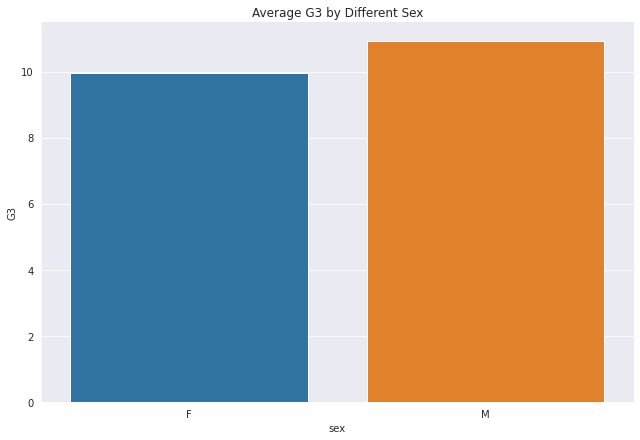

In [ ]:
# Average G3 by Different Sex 

sns.catplot(data=df, x='sex', y='G3', kind='bar', ci=False, aspect=1.5, height=6)
plt.title('Average G3 by Different Sex');

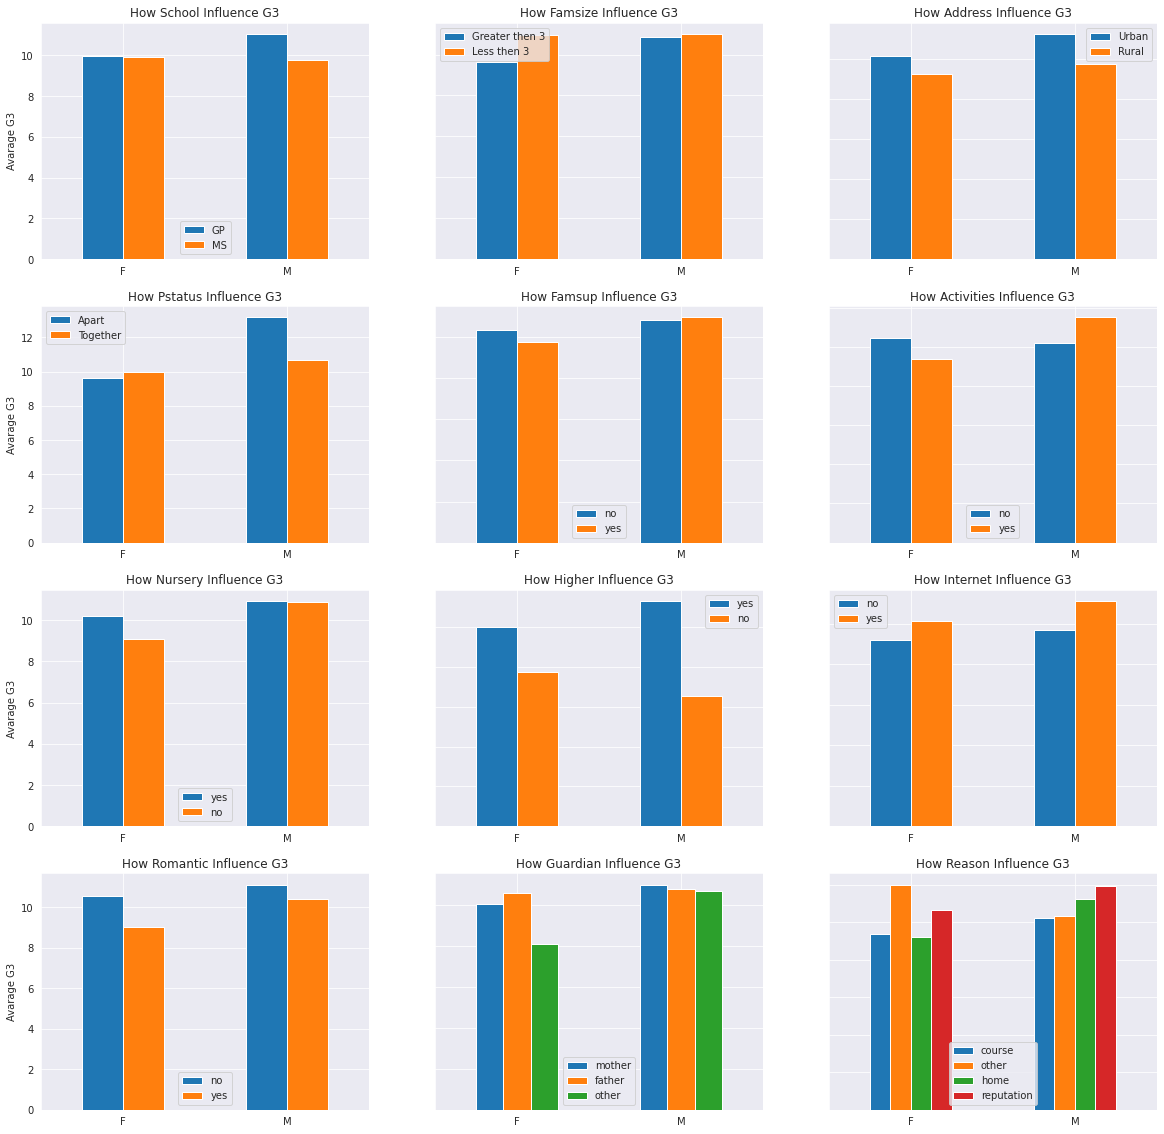

In [ ]:
# some other plots involving other categorical features

f, axes=plt.subplots(4,3,figsize=(20,20))

for i, feature in enumerate(['school','famsize','address','Pstatus', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic','guardian', 'reason']):
    pd.DataFrame(
        {sex:{item: df[(df[feature]==item)&(df.sex==sex)]['G3'].mean() for item in df[feature].unique(
       )} for sex in df.sex.unique()}).transpose().plot(kind='bar', rot=0, ax=axes[i//3, i%3],
            title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)
    
plt.show()

From these plots it follows that : 

*   The variables 'school', 'address', 'higher', 'romantic' and 'Internet' influence both females and males grade in the same way. Specifically, on avarage the students that attend Gabriel Pereira(GP) school have better grades with respect to the Mousinho da Silveira(MS) students. The students who live in a urban zone have better grades with respect to the students that live in Rural zones. The students who plan to continue their studies have better grades with respect to those that do not and the same thing happens with the students who have not a romantic relationship and those who have one. Lastly, students who have an Internet connection have better grades with respect to those that do not have one.
* The variables 'Pstatus' and 'guardian' influence females and males grade in different ways. Indeed, the females who have parents that are together have better grades with respect to those who have divorced parents, while for the males the opposite is true. Similarly, the females who have a guardian different from a parent have worse grades then the females who have a parent as the guardian, instead the males grades do not seem to be influenced by this variable.
* All other considered variables do not influence the grades significantly.

**Analyzing how the weekend and the workday alcohol consumption influence the school performances of the students :**

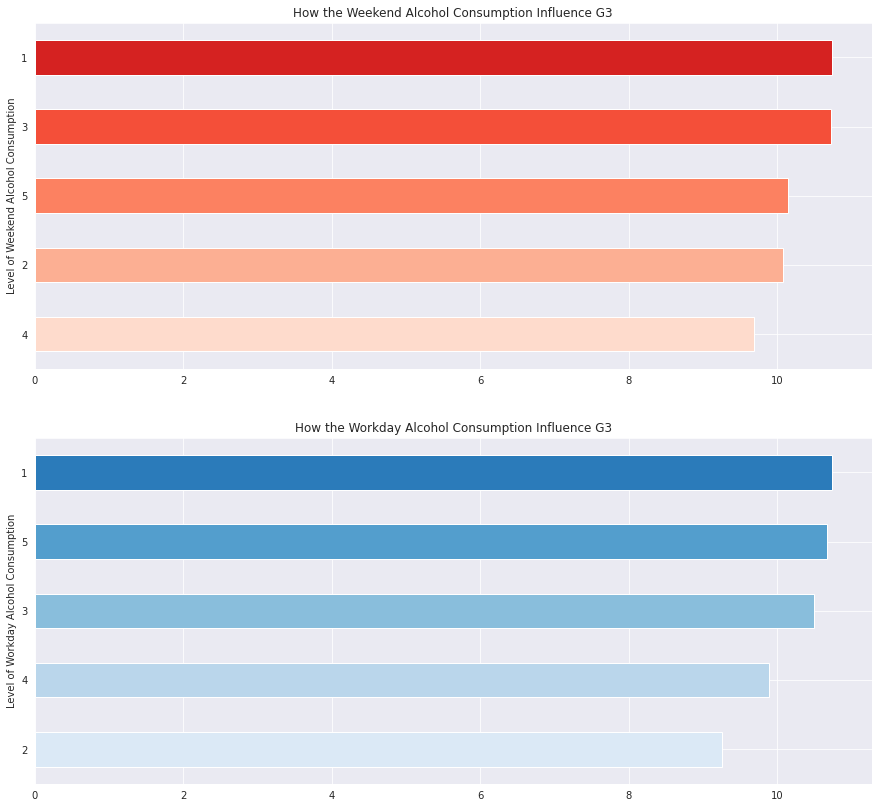

In [ ]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.Series({item:df[df.Walc==item]['G3'].mean() for item in df.Walc.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Reds'), title='How the Weekend Alcohol Consumption Influence G3',
            xlabel='Level of Weekend Alcohol Consumption', ax=axes[0])

pd.Series({item:df[df.Dalc==item]['G3'].mean() for item in df.Dalc.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Blues'), title='How the Workday Alcohol Consumption Influence G3',
            xlabel='Level of Workday Alcohol Consumption', ax=axes[1])

plt.show()

From these plots is clear that on avarage the grades(G3) are influenced by the alcohol consumption. In particular, an higher alcohol consumption is associated with a lower school performance.

**Analyzing if there is any difference between the influence of the alcohol consumption on the males and on the females :**

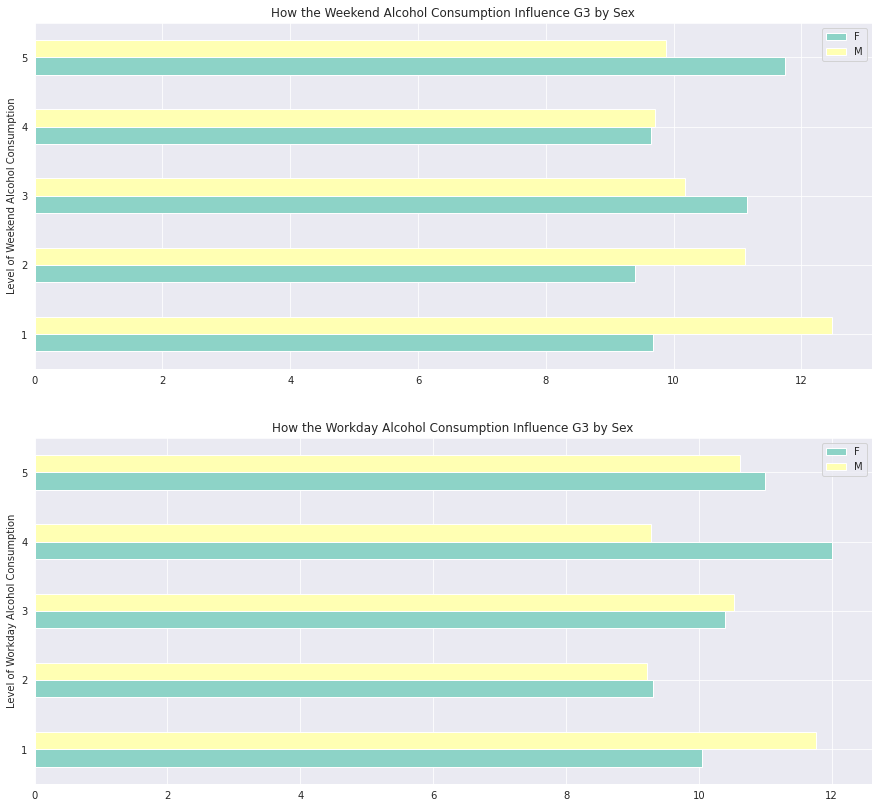

In [ ]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.DataFrame({sex:{i:df[(df.Walc==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('Set3'), title='How the Weekend Alcohol Consumption Influence G3 by Sex',
            xlabel='Level of Weekend Alcohol Consumption', ax=axes[0])

pd.DataFrame({sex:{i:df[(df.Dalc==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('Set3'), title='How the Workday Alcohol Consumption Influence G3 by Sex',
            xlabel='Level of Workday Alcohol Consumption', ax=axes[1])

plt.show()

These plots suggest that males who have a lower alcohol consumption have better grades in general, while for the females the situation is more complicated. Indeed, we have that the females with the highest workday and weekend alcohol consumption, i.e. Walc and Dalc equal to 5, perform better then the others. Probably, since the dataset is small, this is accidental, namely the considered females with an high alcohol consumption are particularly talented or particularly suited for the subject. Moreover, delating these females with the highest alcohol consumption, also for the females we observe an increase of the average grade with the degrowth of alcohol consumption.

**Analyzing how the parents job and education influence the school performances of the students :**

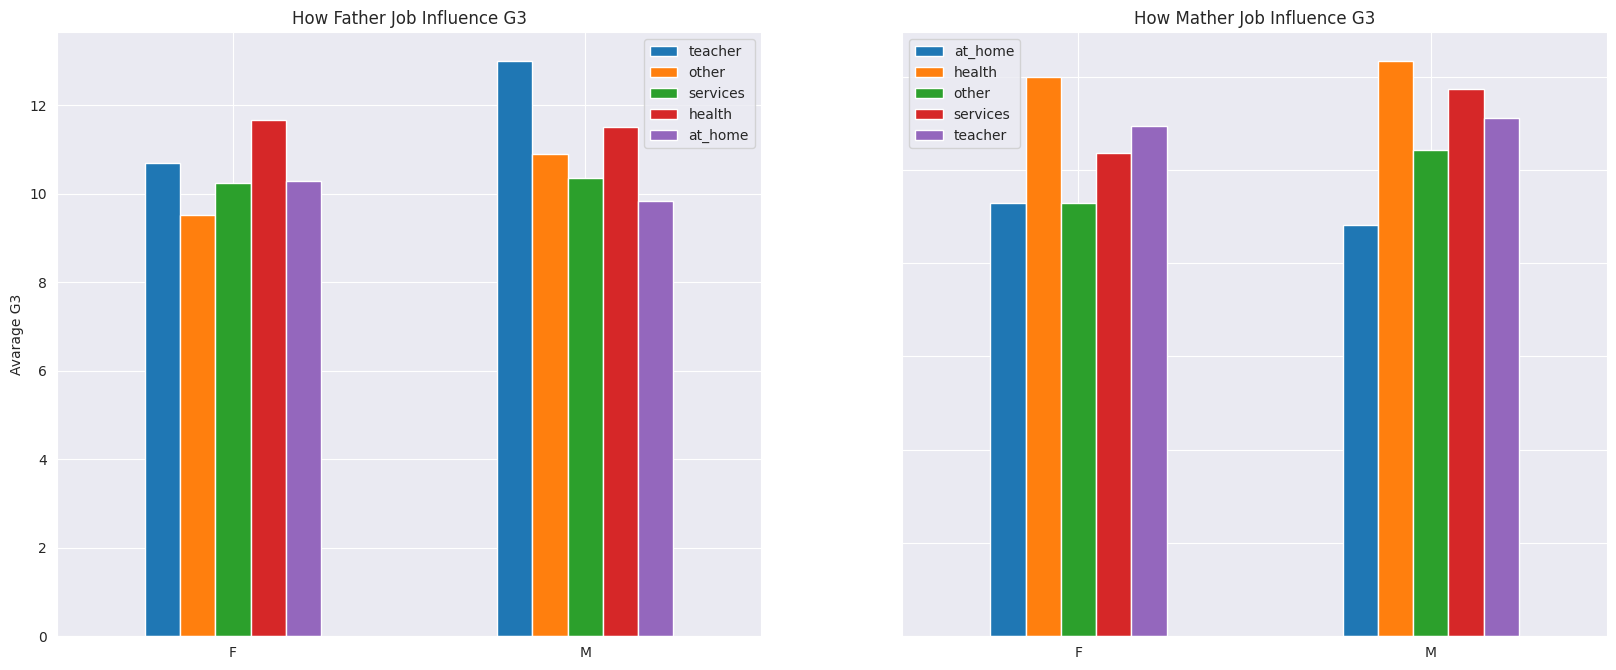

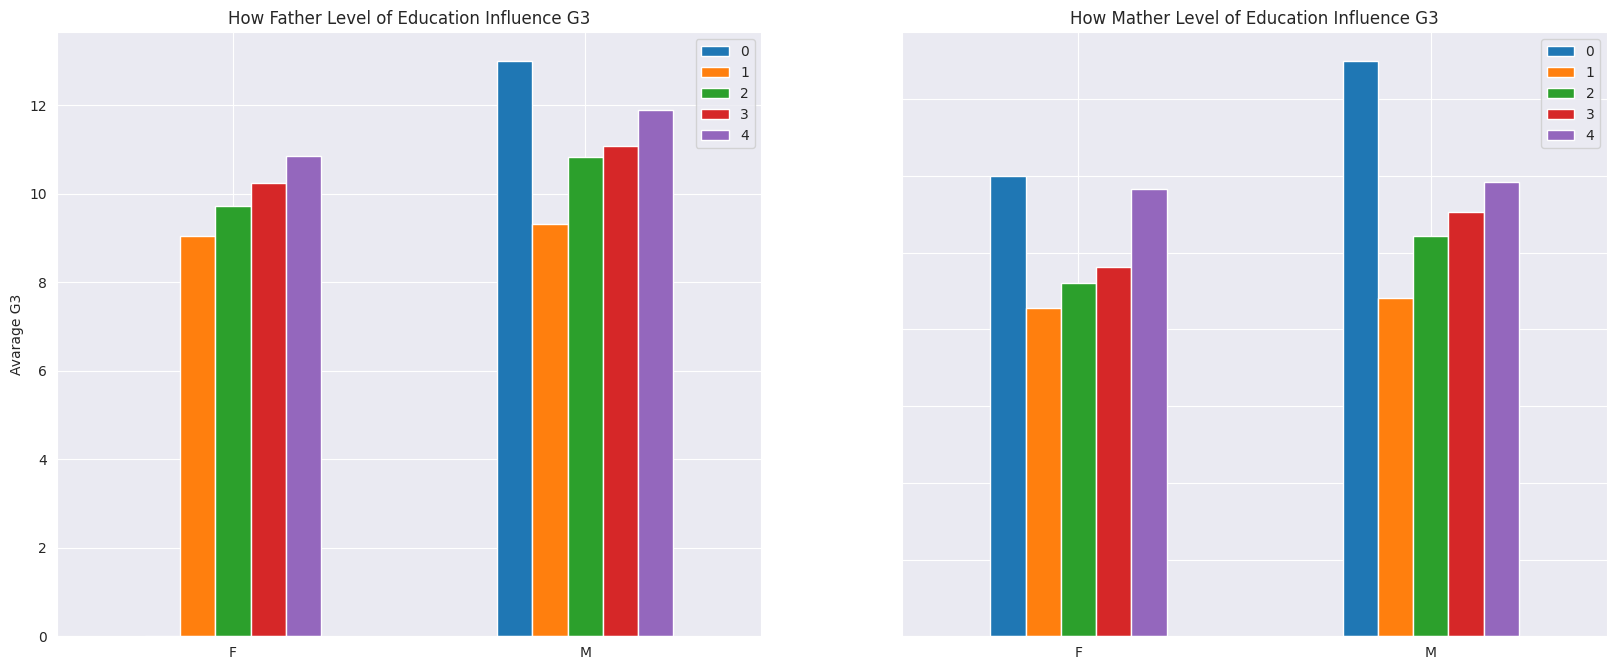

In [ ]:
f, axes=plt.subplots(1,2,figsize=(20,8), dpi=100)
pd.DataFrame(
 {sex:{job: df[(df.Fjob==job)&(df.sex==sex)]['G3'].mean() for job in df.Fjob.unique()} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[0], title=('How Father Job Influence G3'), ylabel='Avarage G3', sharey=True)
axes[0].tick_params(labelrotation=0)

pd.DataFrame(
 {sex:{job: df[(df.Mjob==job)&(df.sex==sex)]['G3'].mean() for job in df.Mjob.unique()} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[1], title='How Mather Job Influence G3', ylabel='Avarage G3', sharey=True)
axes[1].tick_params(labelrotation=0)

plt.show()

f, axes=plt.subplots(1,2,figsize=(20,8), dpi=100)
pd.DataFrame(
 {sex:{edu: df[(df.Fedu==edu)&(df.sex==sex)]['G3'].mean() for edu in range(0,5)} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[0], title=('How Father Level of Education Influence G3'), ylabel='Avarage G3', sharey=True)
axes[0].tick_params(labelrotation=0)

pd.DataFrame(
 {sex:{edu: df[(df.Medu==edu)&(df.sex==sex)]['G3'].mean() for edu in range(0,5)} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[1], title='How Mather Level of Education Influence G3', ylabel='Avarage G3', sharey=True)
axes[1].tick_params(labelrotation=0)

plt.show()

Therefore, for both females and males having a teacher as a parent significantly increase the grade. It is interesting to notice that for females having a parent who works into the health sector increase the grade too, while for males that is not true. Furthermore, for both females and males the avarage grade increases as the level of education of the parents increases. We have an exception for the males who have a father with a level of education equals to zero, but it is plausible that even in this case, as it happens for females with the highest alcohol consumption, this is due to the talent of the latter.

With these plots we have only seen how a single parent education influence G3. Obviously, we expect that students having both parents with high level of education have better grades with respect to those who have only one. Let us consider a plot that allow us to visualize both parents education level :

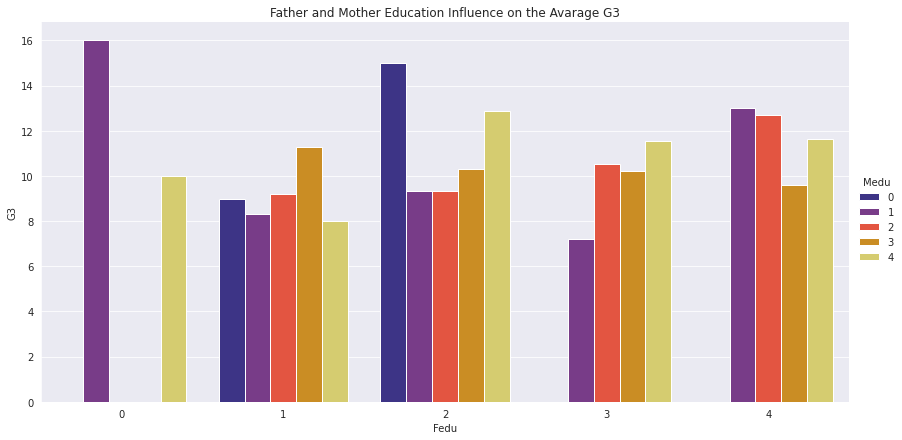

In [ ]:
sns.catplot(data=df, x='Fedu', y='G3', hue='Medu', kind='bar', ci=False, height=6, aspect=2, palette='CMRmap')
plt.title('Father and Mother Education Influence on the Avarage G3');

From the latter is clear that our expectation is met: students with both parents well educated perform better then the students with a single parent who have a high level of education.

**Analyzing how the quality of family relations, the amount of freetime, going out with friends and the health influence G3 :**

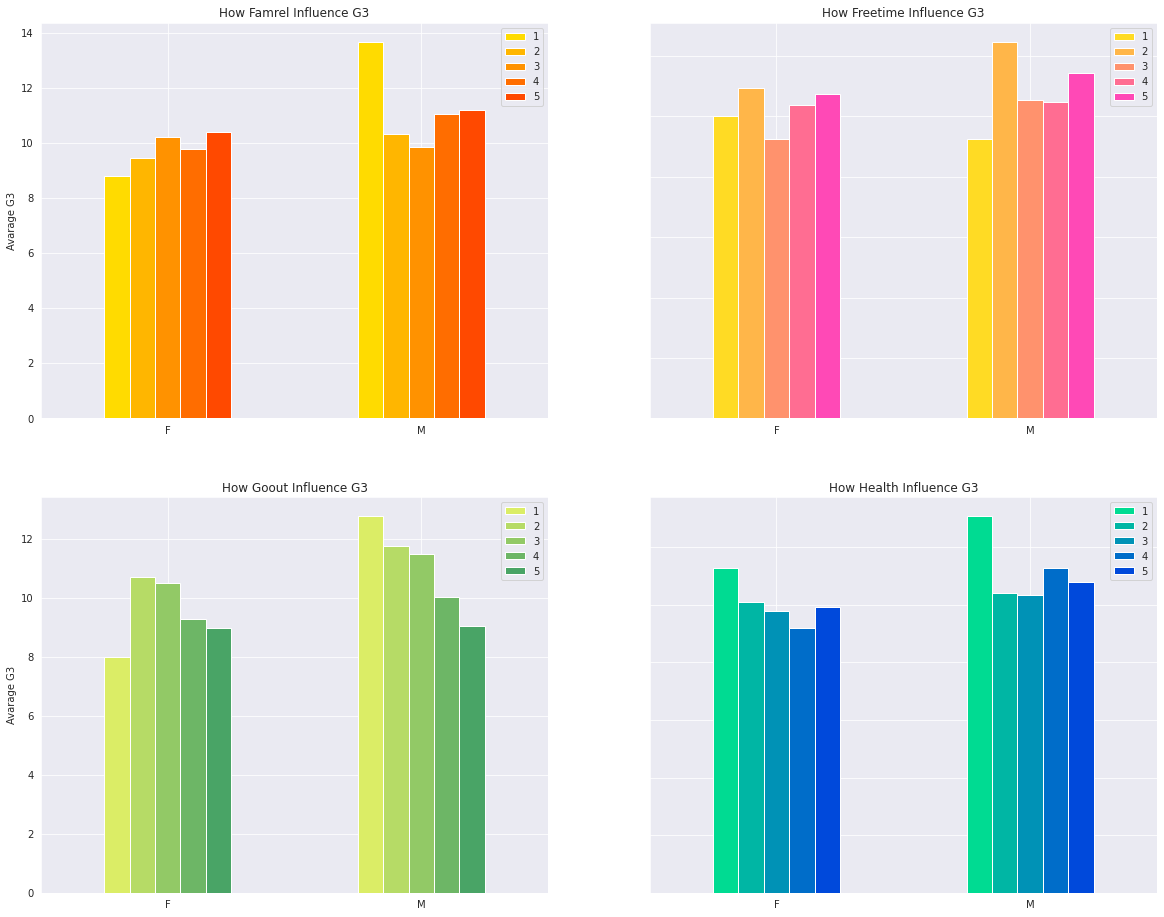

In [ ]:
palette=['autumn_r', 'spring_r', 'summer_r', 'winter_r']

f, axes=plt.subplots(2,2,figsize=(20,16))
for j,feature in enumerate(['famrel', 'freetime', 'goout', 'health']):
    pd.DataFrame({sex:{i:df[(df[feature]==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j//2,j%2], color=sns.color_palette(palette[j]), 
    title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)

1. On avarage the students with a good level of family relations perform better then those who have a poor quality of family relations.
2. For females it is clear that on average the grades tend to decrease with the increasing of free time, while for men this variable does not substantially affect the grades.
3. On avarage students with the poorest level of 'goout' have the worst grades, while those who have a level slightly higher have the best grades. After that all the students with an higher level of 'goout' tend to have worse grades. Thus, students with a decent level of sociability perform better then those who have a terrible or excessive level of sociability.
4. The health slighlty influence the performances of the students and in particular the avarage grades decrease with increasing of the health level. Probably this is due to the fact that students with a poor level of health have a lower level of alcohol consumption and a lower level of sociability. We will see in a while how the health of the students influeces these variables.

**Analyzing how 'studytime' and 'traveltime', influence G3 :**

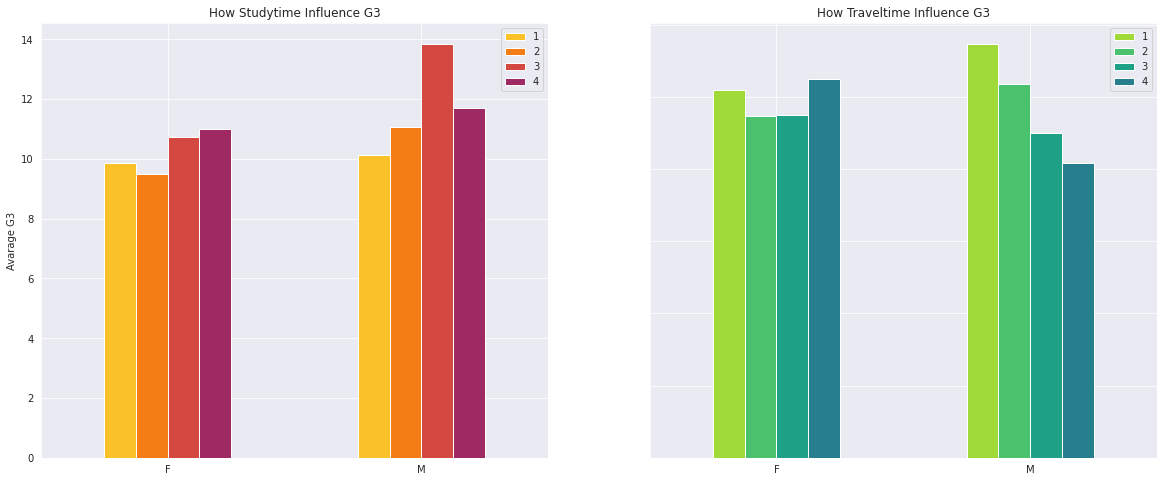

In [ ]:
palette=['inferno_r', 'viridis_r']

f, axes=plt.subplots(1,2,figsize=(20,8))
for j,feature in enumerate(['studytime', 'traveltime']):
    pd.DataFrame({sex:{i:df[(df[feature]==i)&(df.sex==sex)]['G3'].mean() for i in range(1,5)} for sex in df.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j], color=sns.color_palette(palette[j]), 
    title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)

**Analyzing how the last three variables, i.e. 'failures', 'age' and 'absences', influence the latter. We start from 'failures' and 'age' :**

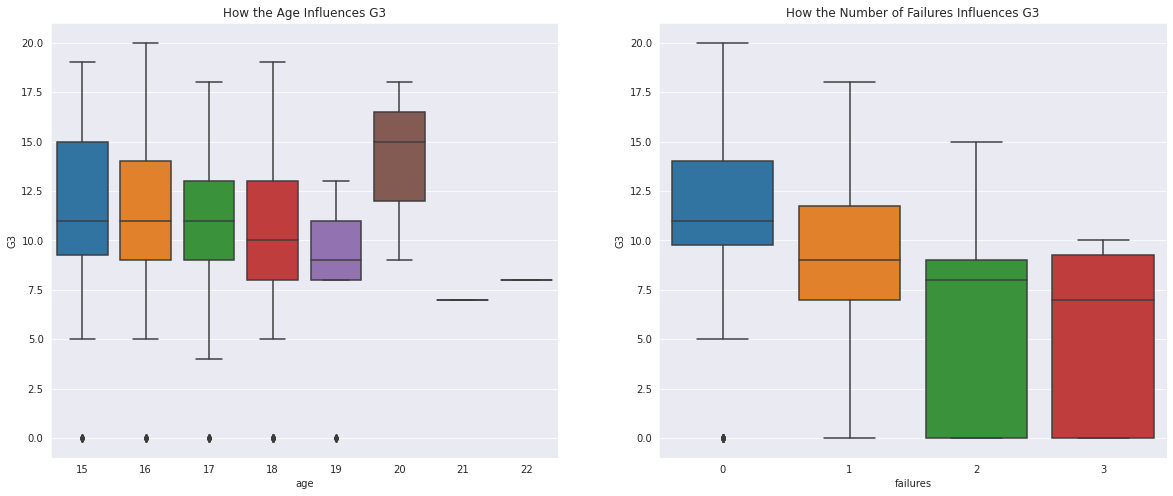

In [ ]:
f, axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(data=df, y='G3', x='age', ax=axes[0]).set(title='How the Age Influences G3')

sns.boxplot(data=df, x='failures', y='G3', ax=axes[1]).set(title='How the Number of Failures Influences G3')

plt.show()

As we can see the median value of G3 is not influenced by the age if the latter is included between 15 and 18, even though the distribution tend to be wider by increasing the age. Conversely, the median value of G3 decreases for ages higher then 18. With regard to the number of failures, the median value of G3 decreases with the increasing of the number of failures.

**Analyzing influence of absences on G3 :**

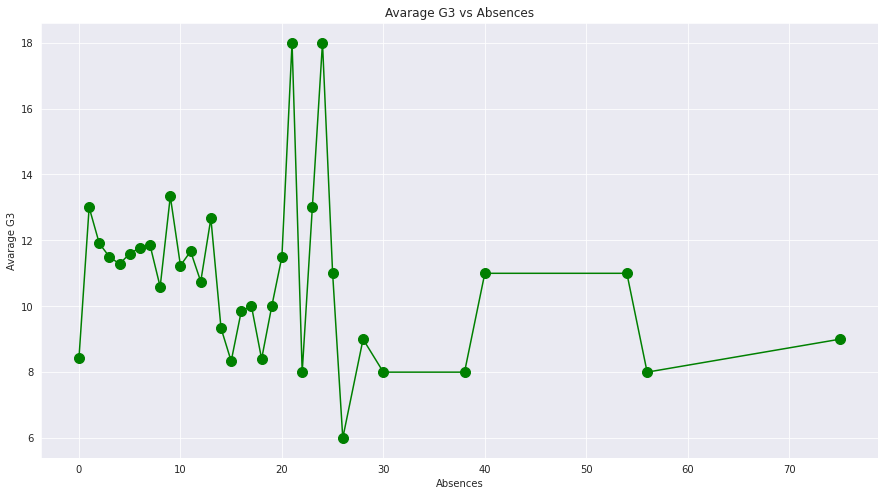

In [ ]:
values=df.groupby('absences')['G3'].mean().values
index=df.groupby('absences')['G3'].mean().index

plt.figure(figsize=(15,8))
plt.plot(index, values, marker='.', markersize=20,linestyle='-', color='green')
plt.xlabel('Absences')
plt.ylabel('Avarage G3')
plt.title('Avarage G3 vs Absences')
plt.show()

Hence, the relation between absences and the grade G3 is pretty irregular.

**Conclusions :**

According to the provided EDA the most important features for the prediction of G3 are 'studytime', 'higher', 'failures', 'goout' and 'Walc'. Moreover, 'failures' variable is by far the most important one.